In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,RocCurveDisplay,auc,roc_curve

import matplotlib.mlab as mlab

import warnings
warnings.simplefilter('ignore')

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import  RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

plt.rcParams['figure.figsize'] = (9, 7)
plt.rcParams['font.size'] = 14

background_color = "#F2F2F2"
color_palette = ["#7456A3","#08BEDF","#008DC3"]
sns.set_style("whitegrid" )
sns.set_theme(style="ticks")
sns.set_palette(color_palette)

C:\Users\user\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\user\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


-<B>Age</B>:  age of the patient years

-<B>Sex</B>:  sex of the patient M: Male, F: Female

-<B>ChestPainType</B>: chest pain type TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic

-<B>RestingBP</B>: resting blood pressure mm Hg

-<B>Cholesterol</B>: serum cholesterol mm/dl

-<B>FastingBS</B>: fasting blood sugar 1: if FastingBS > 120 mg/dl, 0: otherwise

-<B>RestingECG</B>: resting electrocardiogram results Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria

-<B>MaxHR</B>: maximum heart rate achieved Numeric value between 60 and 202

-<B>ExerciseAngina</B>: exercise-induced angina Y: Yes, N: No

-<B>Oldpeak</B>: oldpeak = ST Numeric value measured in depression

-<B>ST_Slope</B>: the slope of the peak exercise ST segment Up: upsloping, Flat: flat, Down: downsloping

-<B>HeartDisease</B>: output  1: heart disease, 0: Normal


In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.duplicated().sum()

0

In [6]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [7]:
df['Sex'] = pd.get_dummies(df['Sex'],drop_first=True)
df['Sex']

0      1
1      0
2      1
3      0
4      1
      ..
913    1
914    1
915    1
916    0
917    1
Name: Sex, Length: 918, dtype: uint8

In [8]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [9]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [10]:
df['ExerciseAngina'] = pd.get_dummies(df['ExerciseAngina'],drop_first=True)
df['ExerciseAngina']

0      0
1      0
2      0
3      1
4      0
      ..
913    0
914    0
915    1
916    0
917    0
Name: ExerciseAngina, Length: 918, dtype: uint8

In [11]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [12]:
enc = LabelEncoder()

In [13]:
df['RestingECG'] = enc.fit_transform(df['RestingECG'])

In [14]:
df['ChestPainType'] = enc.fit_transform(df['ChestPainType'])

In [15]:
df['ST_Slope'] = enc.fit_transform(df['ST_Slope'])

In [16]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("your_report_project.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
for i in df.columns:
    print(f"Unique values in the {i} column = ", df[i].unique())
    print("----------------------------------------------------------------------------")

Unique values in the Age column =  [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
----------------------------------------------------------------------------
Unique values in the Sex column =  [1 0]
----------------------------------------------------------------------------
Unique values in the ChestPainType column =  [1 2 0 3]
----------------------------------------------------------------------------
Unique values in the RestingBP column =  [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
----------------------------------------------------------------------------
Unique values in the Cholesterol column =  [289 180 283 214 195 339 237 208 207 284 211 164 2

### Visulazation for dataset 

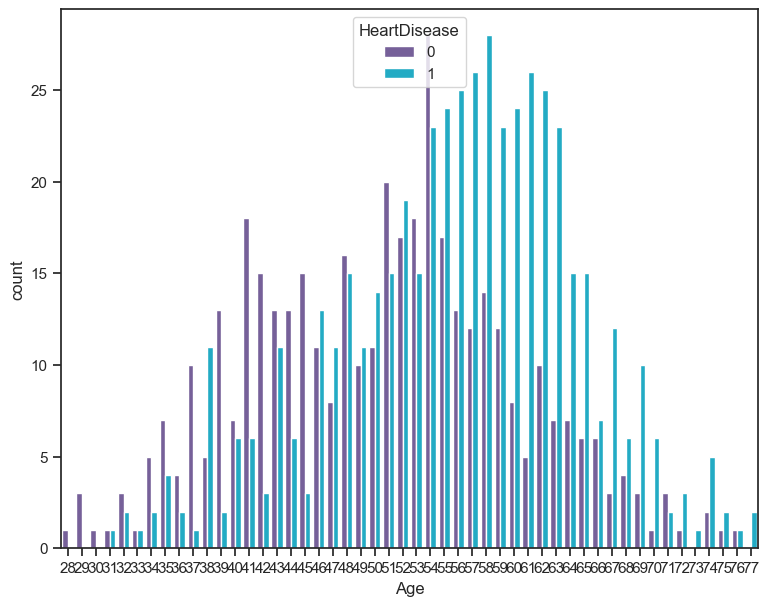

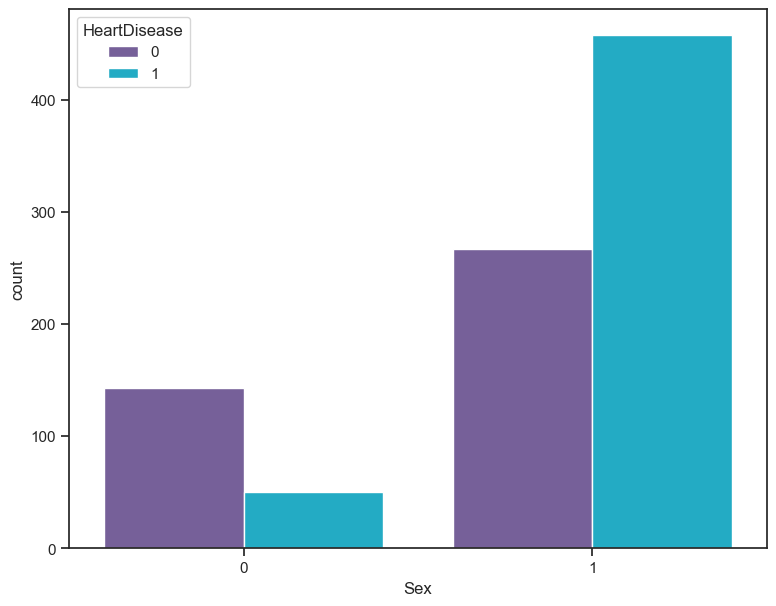

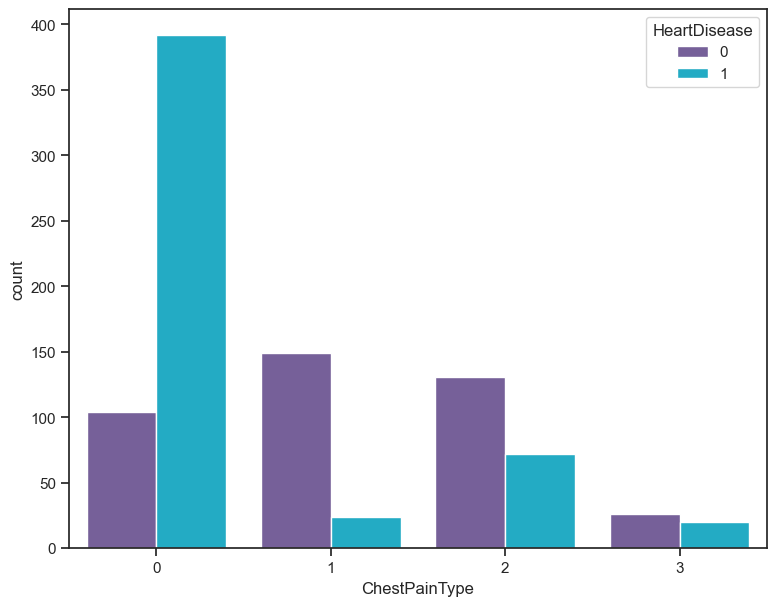

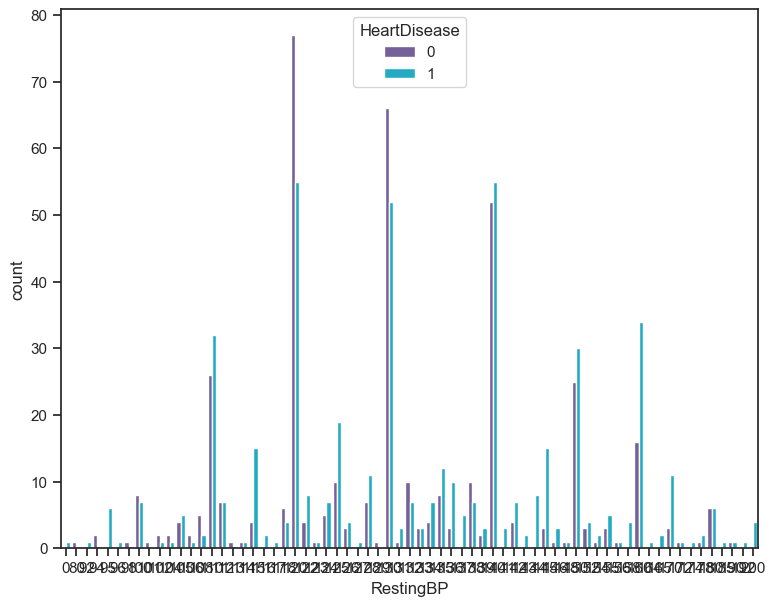

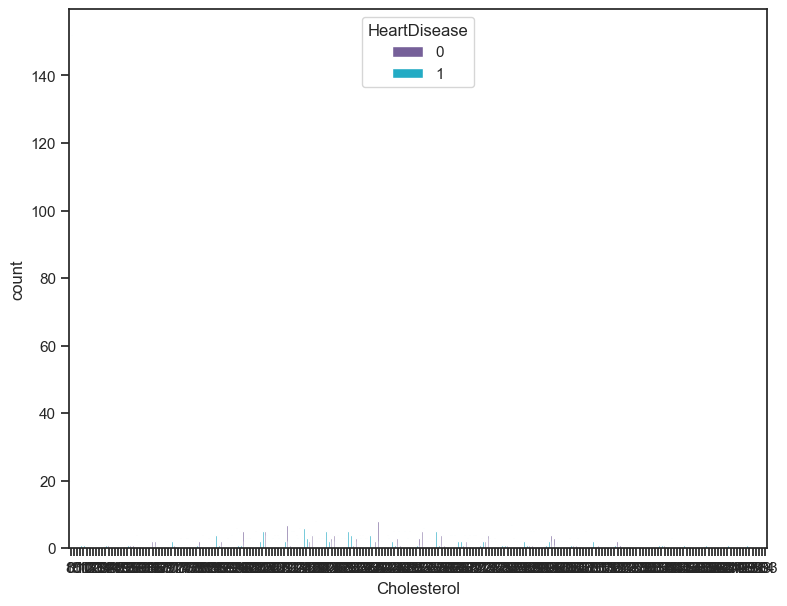

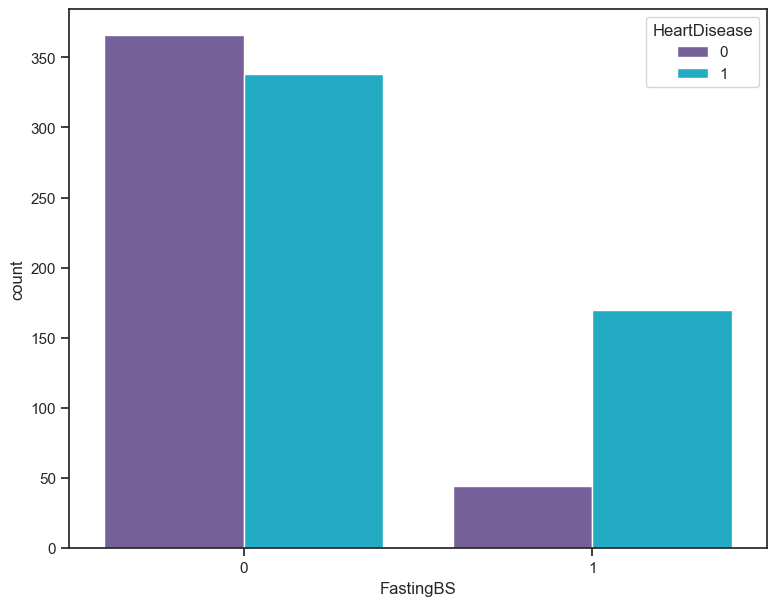

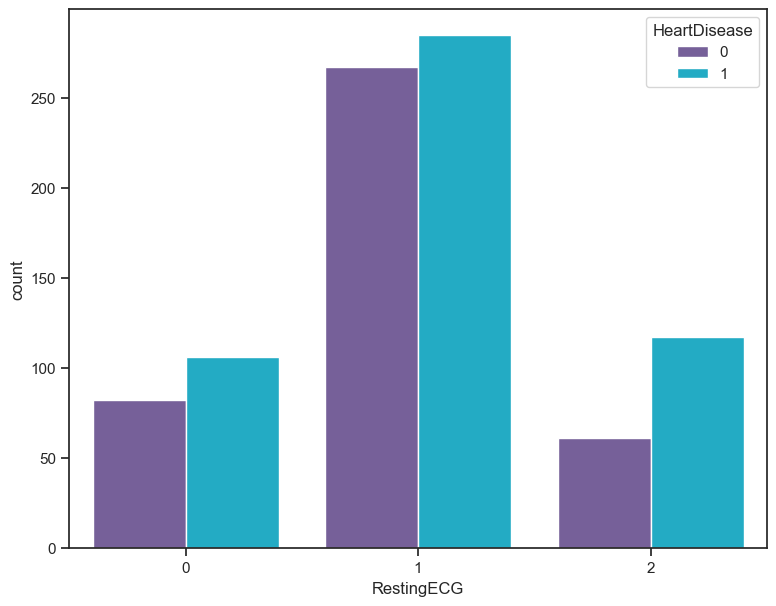

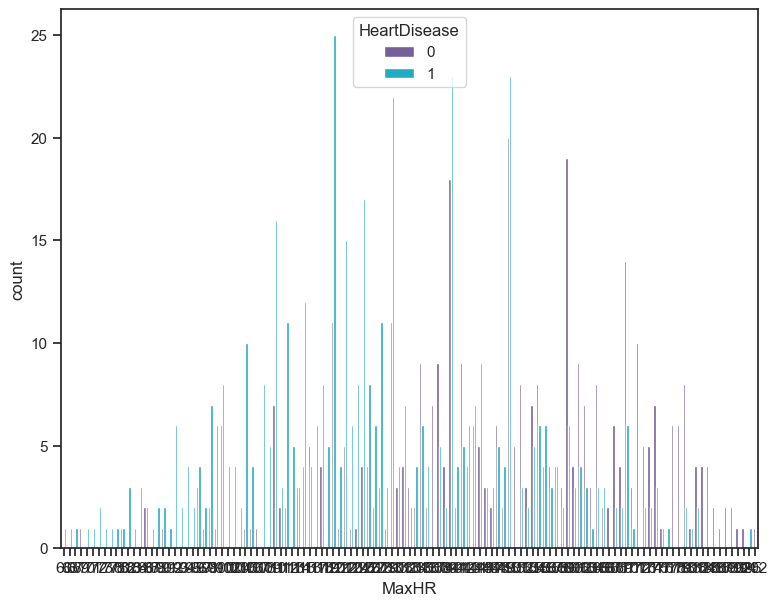

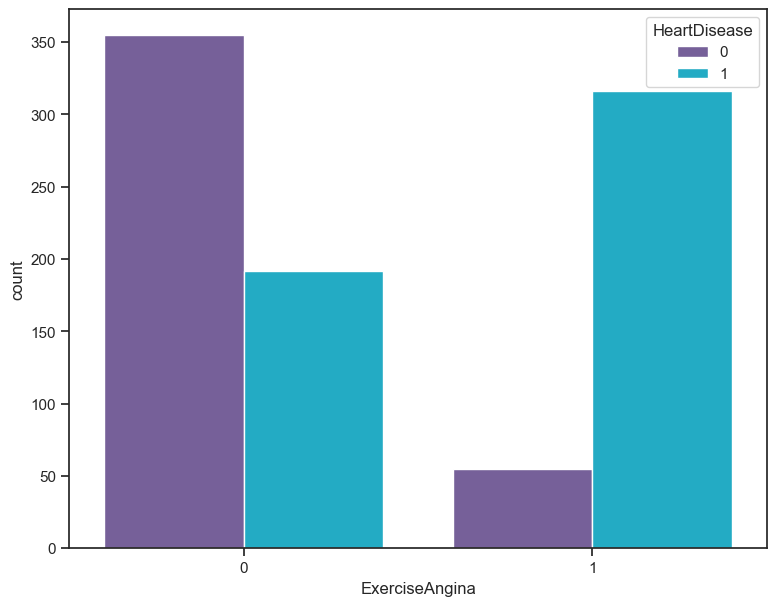

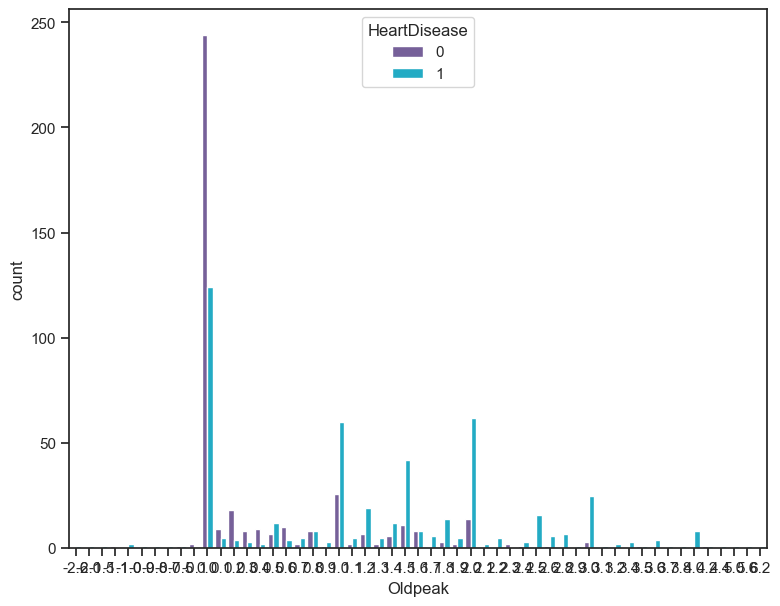

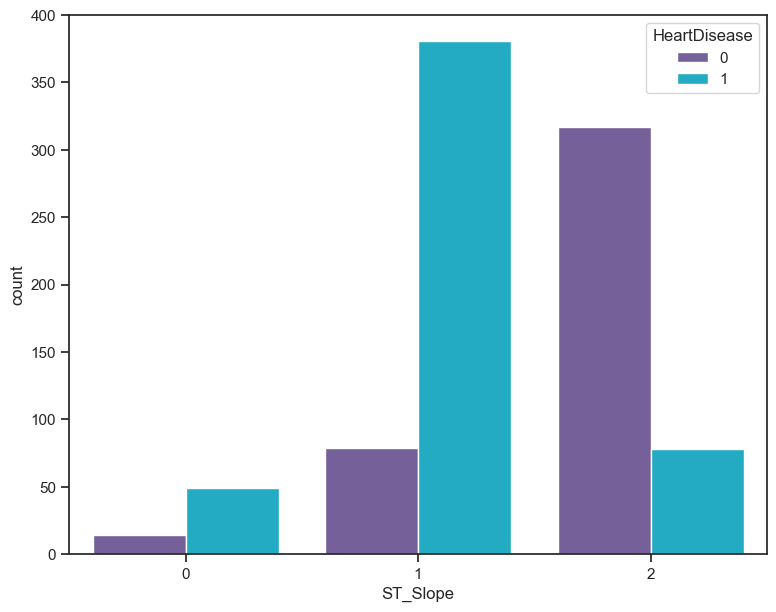

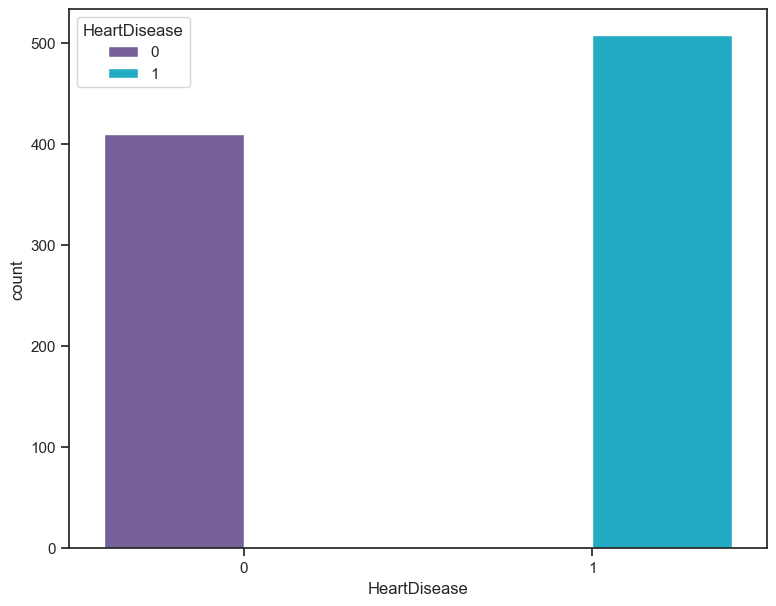

In [18]:
for i in df:
    sns.countplot(df[i] , hue=df['HeartDisease'])
    plt.show();

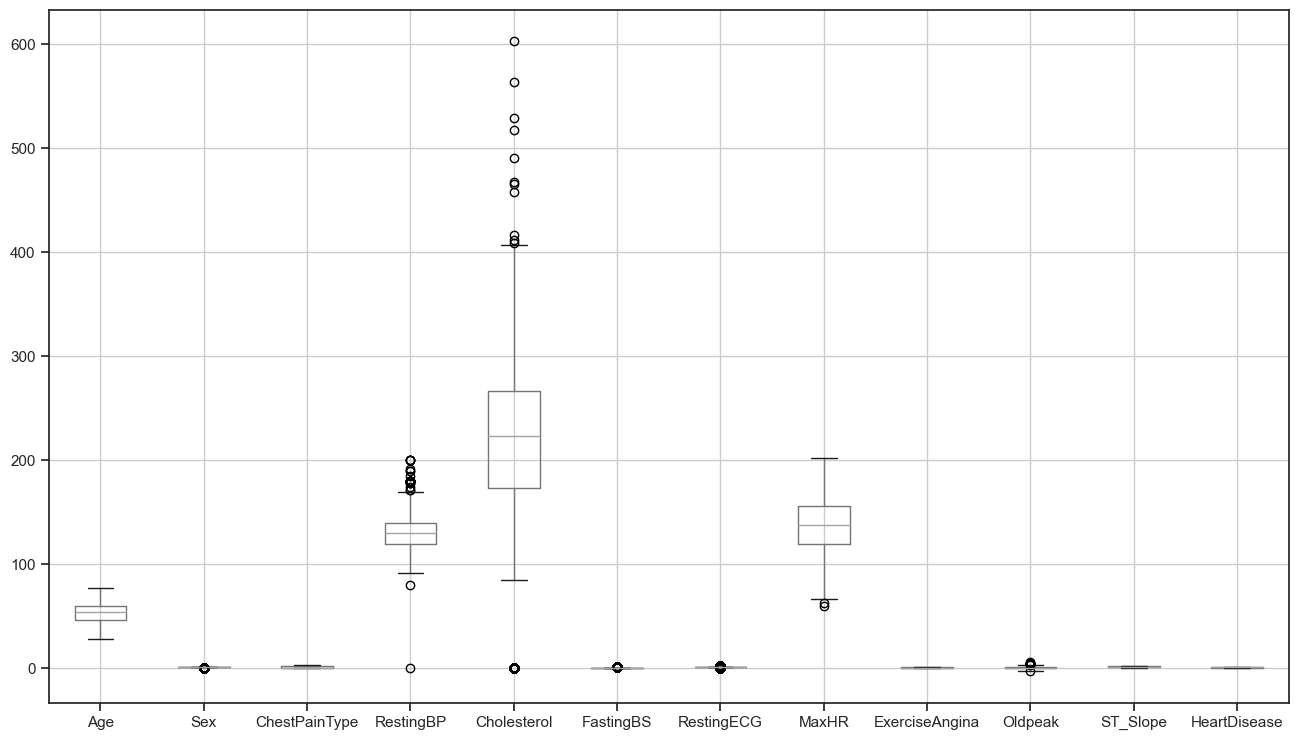

In [19]:
plt.figure(figsize=(16,9))
df.boxplot()
plt.show()

In [20]:
def matrix_plot(df,title):

    sns.set(style="ticks")

    corr = df.corr()
    corr = np.round(corr, decimals=2)


    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(20, 20))
    #cmap = sns.diverging_palette(580, 10, as_cmap=True)
    cmap = sns.diverging_palette(180, 90, as_cmap=True) #Inna paleta barw

    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0.03,annot=True,
                square=True, linewidths=.9, cbar_kws={"shrink": 0.8})
    plt.xticks(rotation=90)
    plt.title(title,fontsize=32,color='#0c343d',alpha=0.5)
    plt.show

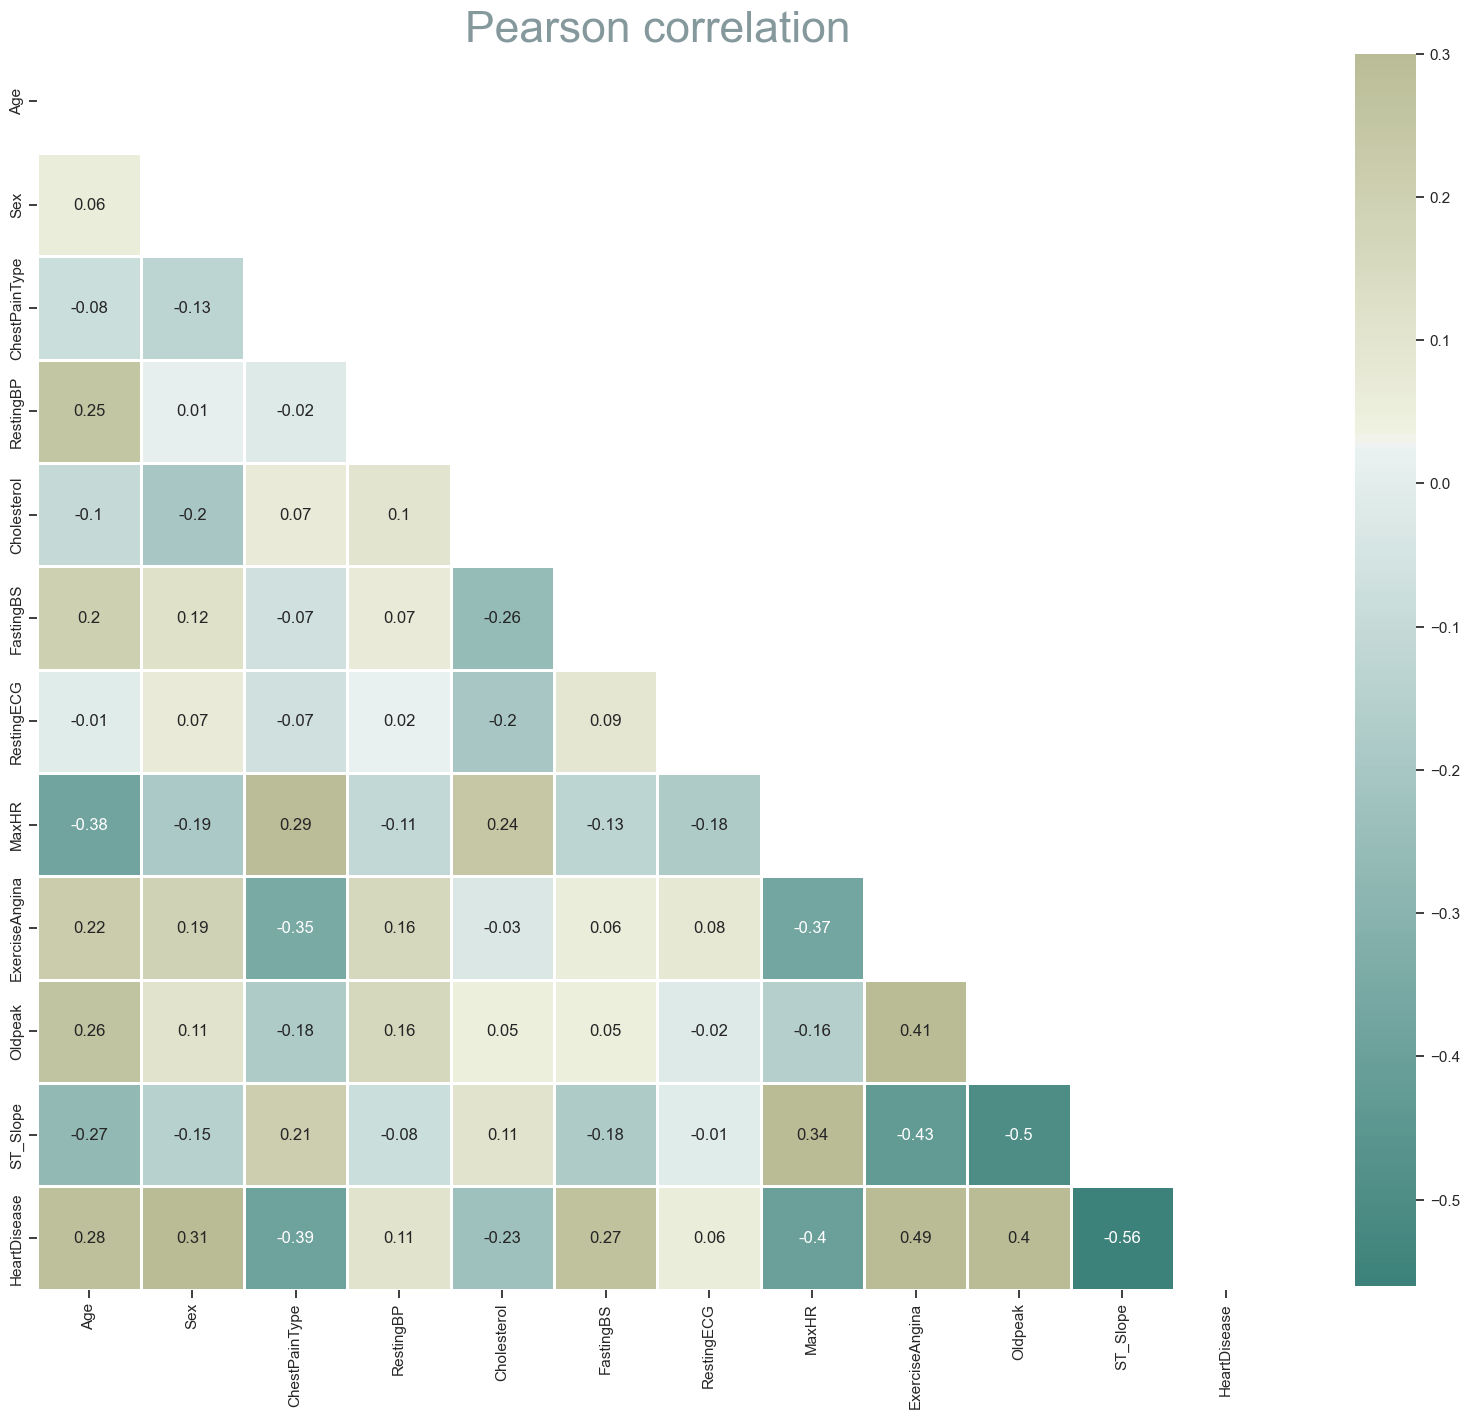

In [21]:
matrix_plot(df,'Pearson correlation')

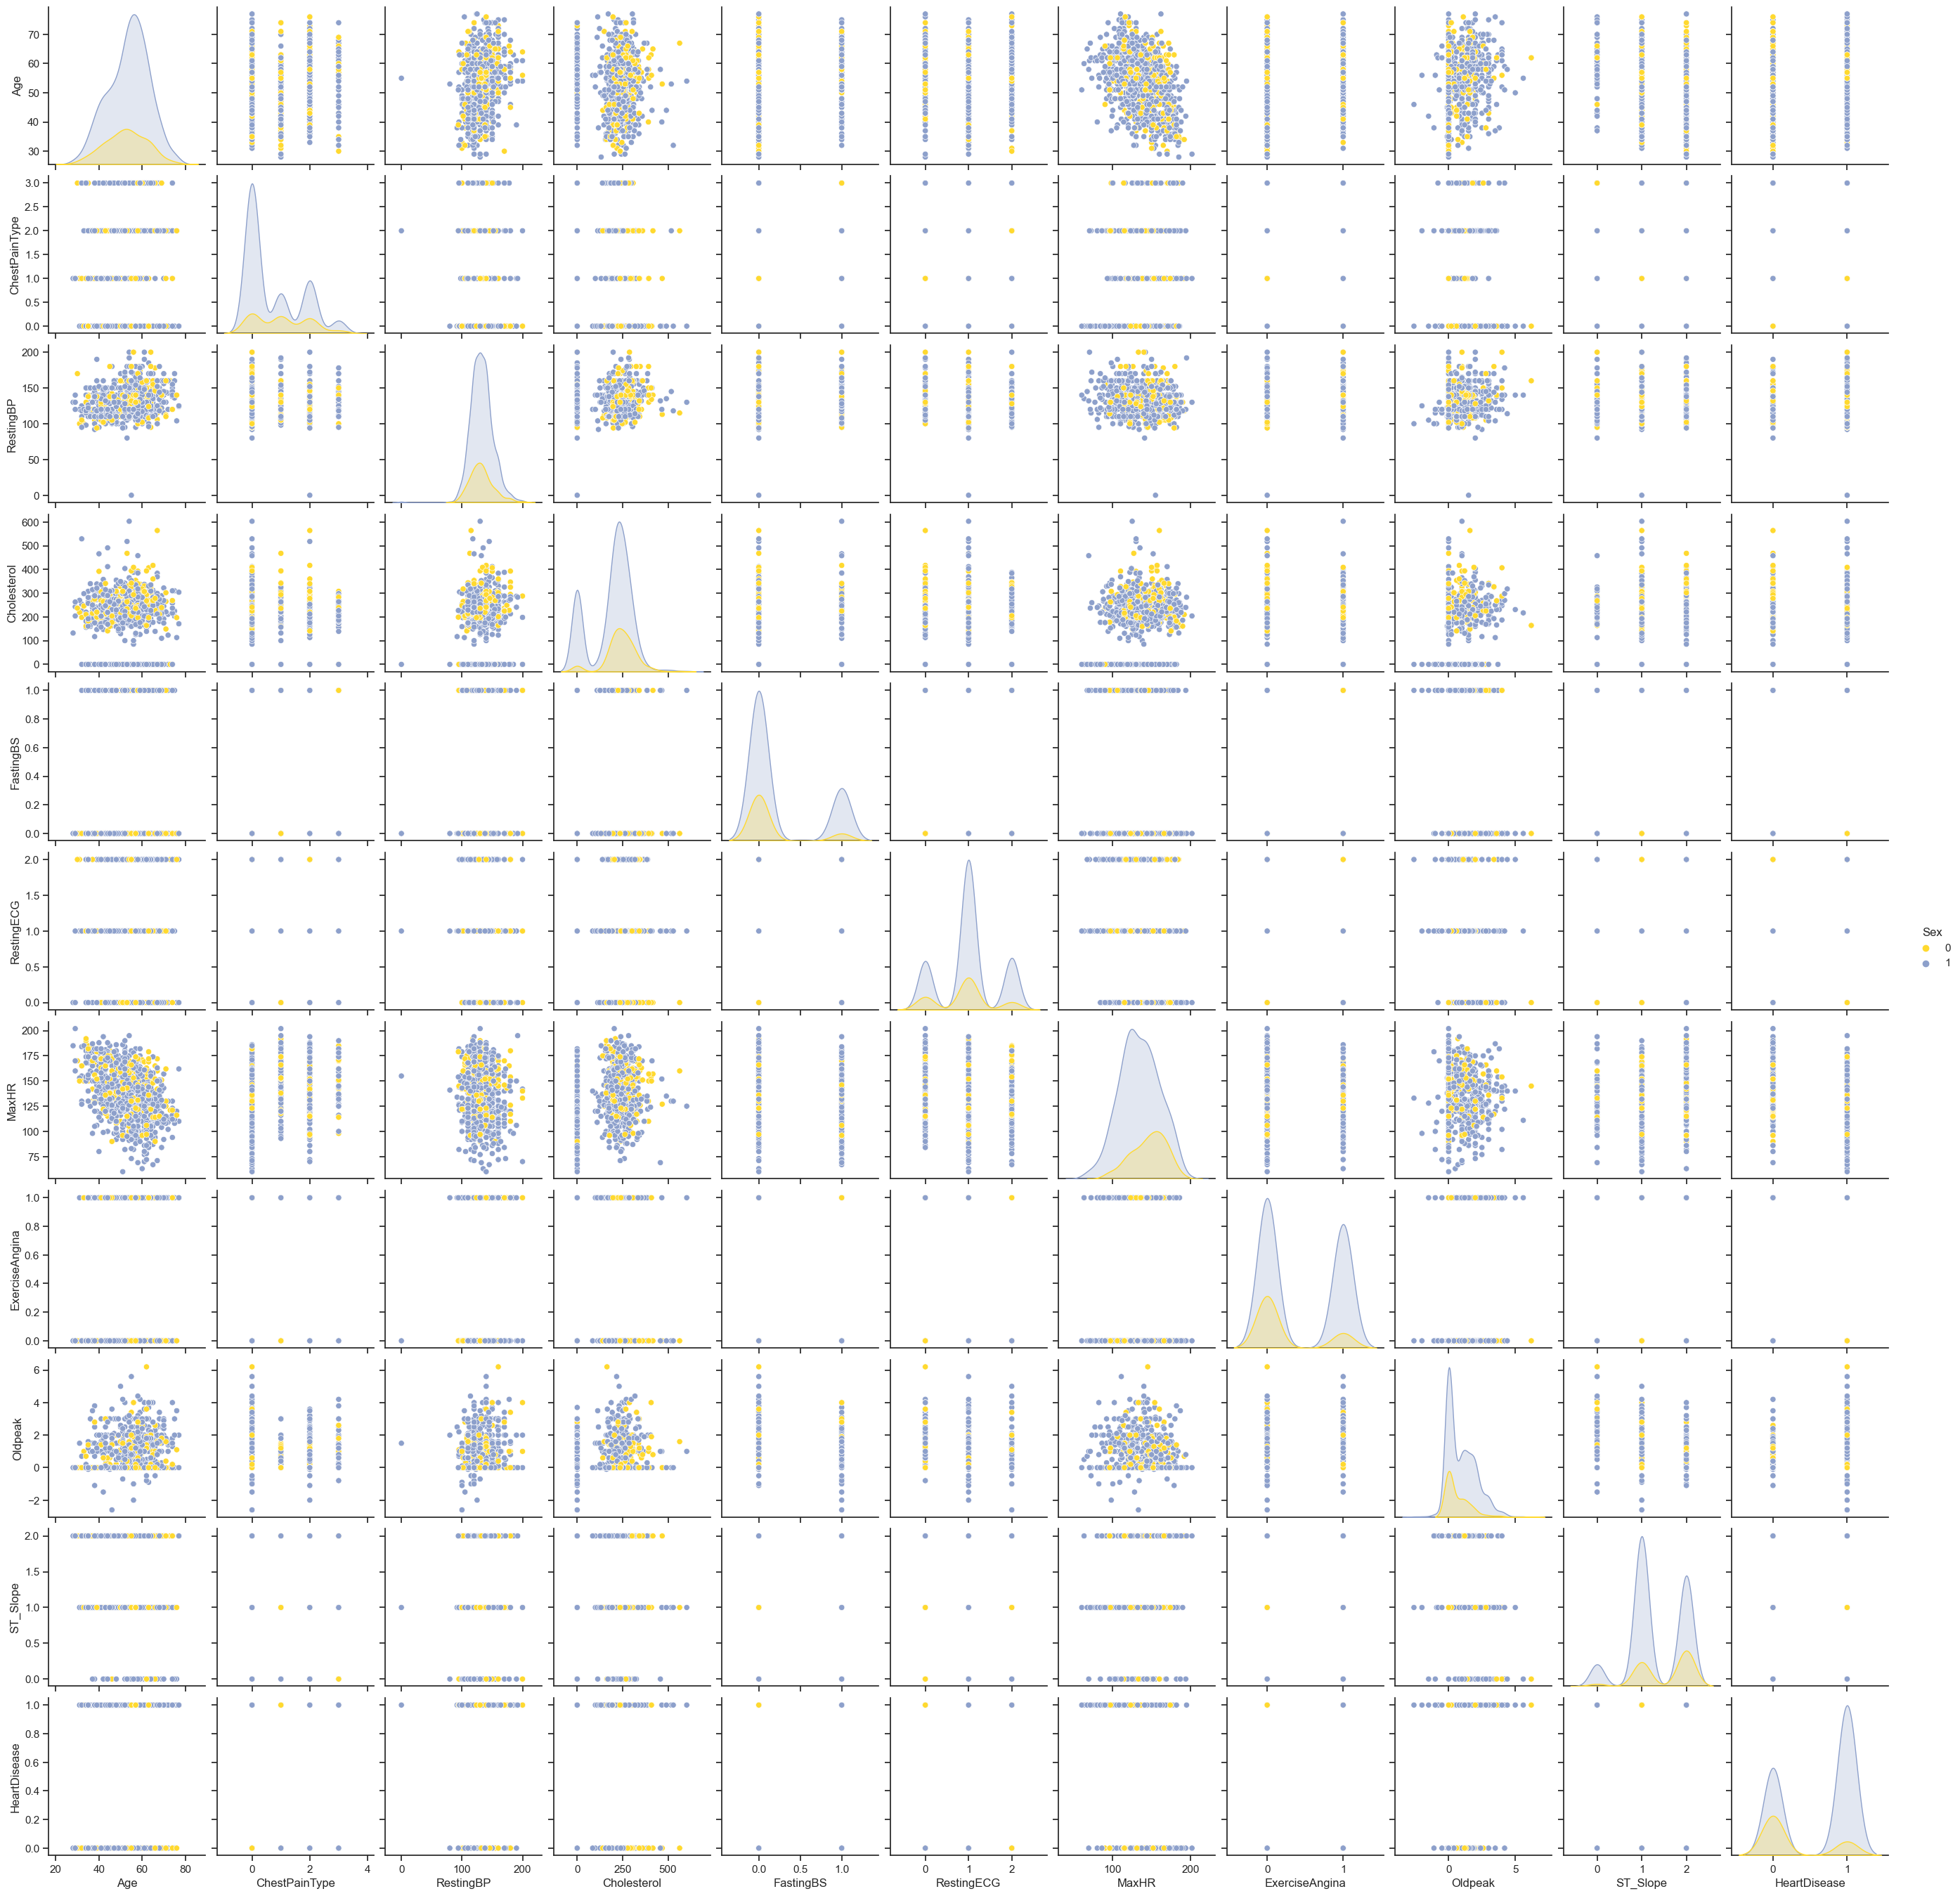

In [22]:
sns.pairplot(df,hue='Sex',palette='Set2_r')
plt.show()

In [23]:
df['Sex'] = df['Sex'].astype(int)
df['ChestPainType'] = df['ChestPainType'].astype(int)
df['RestingECG'] = df['RestingECG'].astype(int)
df['ExerciseAngina'] = df['ExerciseAngina'].astype(int)
df['ST_Slope'] = df['ST_Slope'].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


### Spliting the Dataset

In [25]:
X = df.iloc[:,:-1].values
X

array([[40. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
       [49. ,  0. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
       ...,
       [57. ,  1. ,  0. , ...,  1. ,  1.2,  1. ],
       [57. ,  0. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  1. ,  2. , ...,  0. ,  0. ,  2. ]])

In [26]:
y = df.iloc[:,-1]
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### Statistical Approach 

In [28]:
import statsmodels.api as sm
# If p-value < 0.05 -->Significant
# If p-value > 0.05 -->Not Significant

In [29]:
x_incl_cons = sm.add_constant(X_train)
model = sm.OLS(y_train, x_incl_cons)  #ordinary least square
results = model.fit()  #regresssion results

In [30]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HeartDisease   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     73.52
Date:                Thu, 19 Jan 2023   Prob (F-statistic):          5.55e-110
Time:                        00:12:29   Log-Likelihood:                -253.77
No. Observations:                 734   AIC:                             531.5
Df Residuals:                     722   BIC:                             586.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8305      0.164      5.075      0.000       0.509       1.152
x1             0.0021      0.002      1.307      0.191      -0.001       0.005
x2             0.1488      0.032      4.611      0.000       0.085       0.212
x3            -0.0799      0.015     -5.376      0.000      -0.109      -0.051
x4             0.0005      0.001      0.701      0.483      -0.001       0.002
x5            -0.0006      0.000     -4.640      0.000      -0.001      -0.000
x6             0.1218      0.033      3.736      0.000       0.058       0.186
x7            -0.0318      0.021     -1.509      0.132      -0.073       0.010
x8            -0.0016      0.001     -2.509      0.012      -0.003      -0.000
x9             0.2166      0.032      6.719      0.000       0.153       0.280
x10            0.0570      0.014      3.951      0.000       0.029       0.085
x11           -0.2381      0.027     -8.893      0.000      -0.291      -0.186
==============================================================================
Omnibus:                        6.059   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                6.630
Skew:                          -0.140   Prob(JB):                       0.0363
Kurtosis:                       3.372   Cond. No.                     3.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [32]:
df_temp = df.corr()

count = "Done"
feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                print(Fore.RED + f"\033[1mmulticolinearity alert in between\033[0m {col} - {i}")
        else:
            print(f"For {col} and {i}, there is NO multicollinearity problem") 

print("\033[1mThe number of strong corelated features:\033[0m", count) 

For Age and Age, there is NO multicollinearity problem
For Age and Sex, there is NO multicollinearity problem
For Age and ChestPainType, there is NO multicollinearity problem
For Age and RestingBP, there is NO multicollinearity problem
For Age and Cholesterol, there is NO multicollinearity problem
For Age and FastingBS, there is NO multicollinearity problem
For Age and RestingECG, there is NO multicollinearity problem
For Age and MaxHR, there is NO multicollinearity problem
For Age and ExerciseAngina, there is NO multicollinearity problem
For Age and Oldpeak, there is NO multicollinearity problem
For Age and ST_Slope, there is NO multicollinearity problem
For Age and HeartDisease, there is NO multicollinearity problem
For Sex and Age, there is NO multicollinearity problem
For Sex and Sex, there is NO multicollinearity problem
For Sex and ChestPainType, there is NO multicollinearity problem
For Sex and RestingBP, there is NO multicollinearity problem
For Sex and Cholesterol, there is NO

In [33]:
df[df['HeartDisease']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')


,count,mean,std,min,25%,50%,75%,max
Age,410.000000,50.551220,9.444915,28.000000,43.000000,51.000000,57.000000,76.000000
Sex,410.000000,0.651220,0.477167,0.000000,0.000000,1.000000,1.000000,1.000000
ChestPainType,410.000000,1.192683,0.889738,0.000000,0.000000,1.000000,2.000000,3.000000
RestingBP,410.000000,130.180488,16.499585,80.000000,120.000000,130.000000,140.000000,190.000000
Cholesterol,410.000000,227.121951,74.634659,0.000000,197.250000,227.000000,266.750000,564.000000
FastingBS,410.000000,0.107317,0.309894,0.000000,0.000000,0.000000,0.000000,1.000000
RestingECG,410.000000,0.948780,0.589070,0.000000,1.000000,1.000000,1.000000,2.000000
MaxHR,410.000000,148.151220,23.288067,69.000000,134.000000,150.000000,165.000000,202.000000
ExerciseAngina,410.000000,0.134146,0.341226,0.000000,0.000000,0.000000,0.000000,1.000000
Oldpeak,410.000000,0.408049,0.699709,-1.100000,0.000000,0.000000,0.600000,4.200000


In [34]:
df[df['HeartDisease']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Age,508.000000,55.899606,8.727056,31.000000,51.000000,57.000000,62.000000,77.000000
Sex,508.000000,0.901575,0.298182,0.000000,1.000000,1.000000,1.000000,1.000000
ChestPainType,508.000000,0.448819,0.876686,0.000000,0.000000,0.000000,0.000000,3.000000
RestingBP,508.000000,134.185039,19.828685,0.000000,120.000000,132.000000,145.000000,200.000000
Cholesterol,508.000000,175.940945,126.391398,0.000000,0.000000,217.000000,267.000000,603.000000
FastingBS,508.000000,0.334646,0.472332,0.000000,0.000000,0.000000,1.000000,1.000000
RestingECG,508.000000,1.021654,0.662852,0.000000,1.000000,1.000000,1.000000,2.000000
MaxHR,508.000000,127.655512,23.386923,60.000000,112.000000,126.000000,144.250000,195.000000
ExerciseAngina,508.000000,0.622047,0.485354,0.000000,0.000000,1.000000,1.000000,1.000000
Oldpeak,508.000000,1.274213,1.151872,-2.600000,0.000000,1.200000,2.000000,6.200000


### Normalization the dataset 

In [35]:
mn = MinMaxScaler()

In [36]:
X_train = mn.fit_transform(X_train)

In [37]:
X_test = mn.fit_transform(X_test)

### Modeling 

#### 1.Random Forest

#### Before hyper parameter

In [38]:
RFC = RandomForestClassifier()

In [39]:
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
y_pred_rf = RFC.predict(X_test)

<AxesSubplot:>

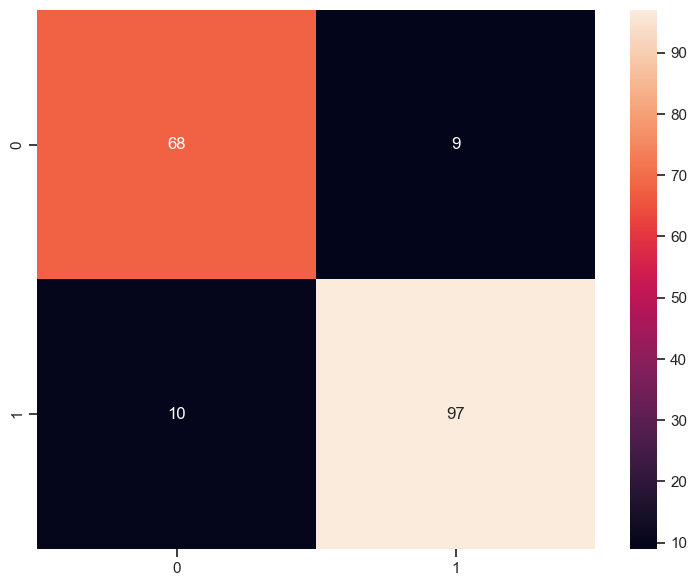

In [41]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d")

In [42]:
score_RF_t = RFC.score(X_train, y_train)
acc_rf = accuracy_score(y_test, y_pred_rf)
clr_rf = classification_report(y_test, y_pred_rf)
print('The score is \n',score_RF_t)
print('------------------')
print('The accuracy is \n',acc_rf)
print('------------------')
print('The Confusion marix \n',cm_rf)
print('------------------')
print(clr_rf)

The score is 
 1.0
------------------
The accuracy is 
 0.8967391304347826
------------------
The Confusion marix 
 [[68  9]
 [10 97]]
------------------
              precision    recall  f1-score   support

           0       0.87      0.88      0.88        77
           1       0.92      0.91      0.91       107

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



#### After hyper parameter

In [43]:
param_grid = {'n_estimators': [100, 200, 300, 400, 500, 600],
              'min_samples_leaf': [1, 2, 3, 4, 5, 6],
              'min_samples_split':[1, 2, 3, 4, 5, 6],
              'max_depth':[1, 2, 3, 4, 5, 6],}
param_grid

{'n_estimators': [100, 200, 300, 400, 500, 600],
 'min_samples_leaf': [1, 2, 3, 4, 5, 6],
 'min_samples_split': [1, 2, 3, 4, 5, 6],
 'max_depth': [1, 2, 3, 4, 5, 6]}

In [44]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5)

In [45]:
#grid_search.fit(X_train, y_train)

In [46]:
grid_search.score(X_test, y_test)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [47]:
grid_search.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [48]:
grid_search.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [49]:
RFC_gs = RandomForestClassifier(min_samples_leaf= 2, min_samples_split= 1, n_estimators= 300, max_depth=6)
RFC_gs = RFC.fit(X_train, y_train)


# Prediction:
y_pred_gs = RFC_gs.predict(X_test)
y_pred_gs


array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [50]:
score_RF_gs_t = RFC_gs.score(X_train, y_train)
cm_rf_gs = confusion_matrix(y_test, y_pred_gs)

acc_rf_gs = accuracy_score(y_test, y_pred_gs)
clr_rf_gs = classification_report(y_test, y_pred_gs)
print('The score is \n',score_RF_gs_t)
print('------------------')
print('The accuracy is \n',acc_rf_gs)
print('------------------')
print('The Confusion marix \n',cm_rf_gs)
print('------------------')
print('The classification report \n',clr_rf_gs)

The score is 
 1.0
------------------
The accuracy is 
 0.875
------------------
The Confusion marix 
 [[68  9]
 [14 93]]
------------------
The classification report 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86        77
           1       0.91      0.87      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



In [51]:
y_proba = RFC.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
#plot_roc_(false_positive_rate,true_positive_rate,roc_auc)
roc_auc

0.9369462313387547

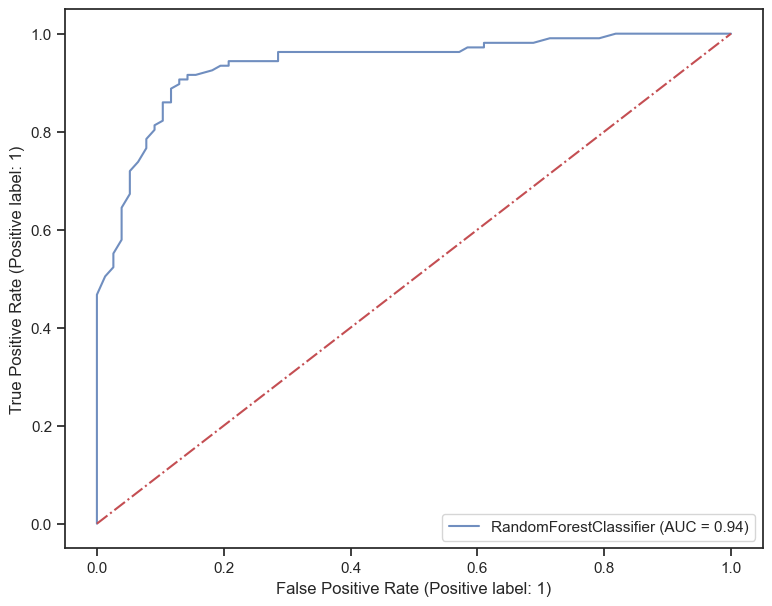

In [52]:
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(RFC, X_test, y_test, ax=ax, alpha=0.8)
plt.plot([0, 1], [0, 1], color='r',  linestyle='-.')

#### 2.XGBoost

In [53]:
XGC = XGBClassifier()

In [54]:
XGC.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [55]:
y_pred_xg = XGC.predict(X_test)
y_pred_xg

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1])

<AxesSubplot:>

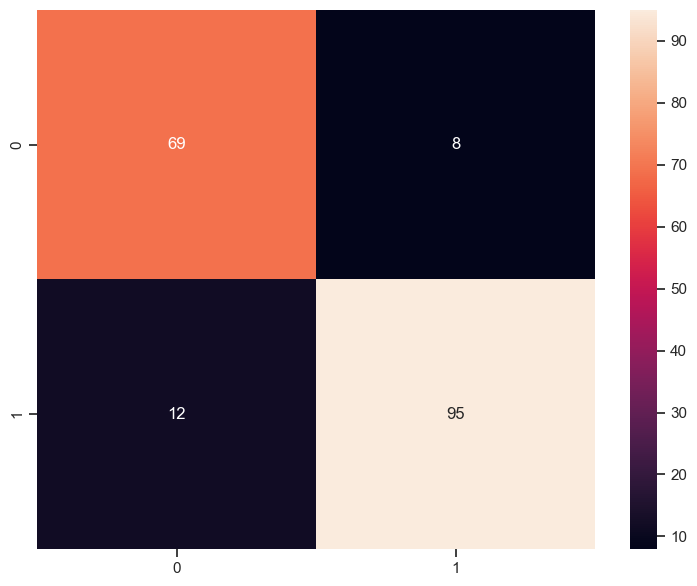

In [56]:
cm_xg = confusion_matrix(y_test, y_pred_xg)
sns.heatmap(cm_xg, annot=True, fmt="d")

In [57]:
acc_xg = accuracy_score(y_test, y_pred_xg)
clr_xg = classification_report(y_test, y_pred_xg)
print('The accuracy is \n',acc_xg)
print('------------------')
print('The Confusion marix \n',cm_xg)
print('------------------')
print(clr_xg)

The accuracy is 
 0.8913043478260869
------------------
The Confusion marix 
 [[69  8]
 [12 95]]
------------------
              precision    recall  f1-score   support

           0       0.85      0.90      0.87        77
           1       0.92      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



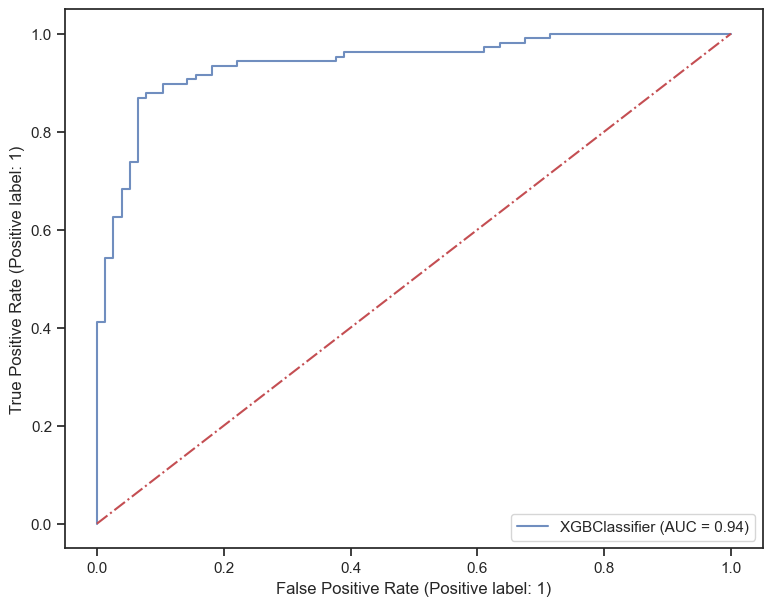

In [58]:
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(XGC, X_test, y_test, ax=ax, alpha=0.8)
plt.plot([0, 1], [0, 1], color='r',  linestyle='-.')

#### 3.AdaBoost

In [59]:
ada = AdaBoostClassifier(n_estimators=150)
ada.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=150)

In [60]:
y_pred_ad = ada.predict(X_test)
y_pred_ad

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

<AxesSubplot:>

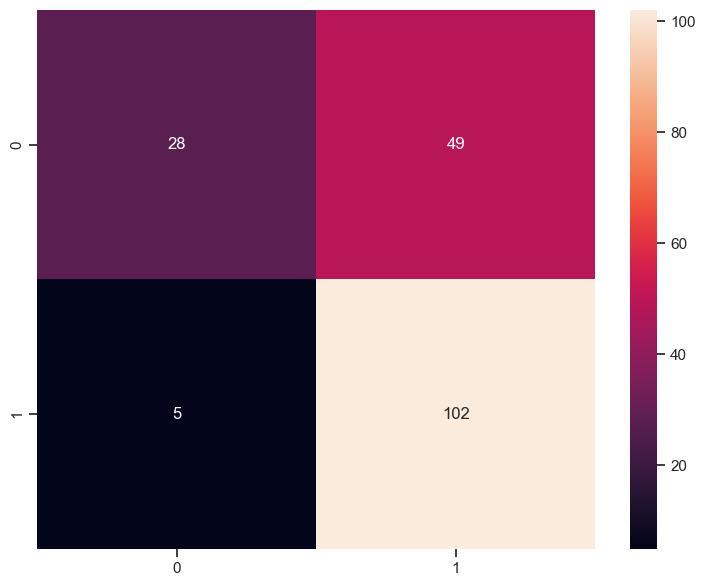

In [61]:
cm_ad = confusion_matrix(y_test, y_pred_ad)
sns.heatmap(cm_ad, annot=True, fmt="d")

In [62]:
acc_ad = accuracy_score(y_test, y_pred_ad)
clr_ad = classification_report(y_test, y_pred_ad)
print('The accuracy is \n',acc_ad)
print('------------------')
print('The Confusion marix \n',cm_ad)
print('------------------')
print(clr_ad)

The accuracy is 
 0.7065217391304348
------------------
The Confusion marix 
 [[ 28  49]
 [  5 102]]
------------------
              precision    recall  f1-score   support

           0       0.85      0.36      0.51        77
           1       0.68      0.95      0.79       107

    accuracy                           0.71       184
   macro avg       0.76      0.66      0.65       184
weighted avg       0.75      0.71      0.67       184



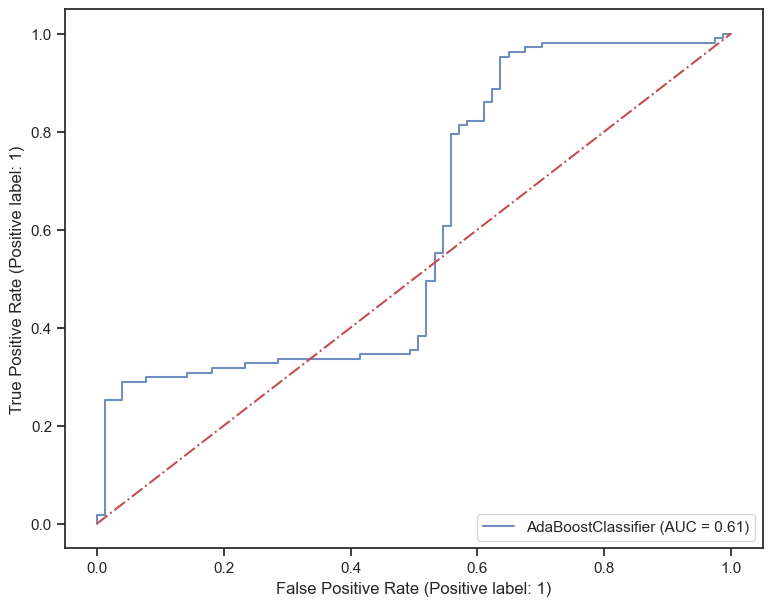

In [63]:
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(ada, X_test, y_test, ax=ax, alpha=0.8)
plt.plot([0, 1], [0, 1], color='r',  linestyle='-.')

#### 4.GradientBoostingClassifier

In [64]:
GBC = GradientBoostingClassifier(n_estimators=600, learning_rate=0.1,max_depth=6, random_state=42).fit(X_train, y_train)

In [65]:
y_pred_gb = GBC.predict(X_test)
y_pred_gb

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

<AxesSubplot:>

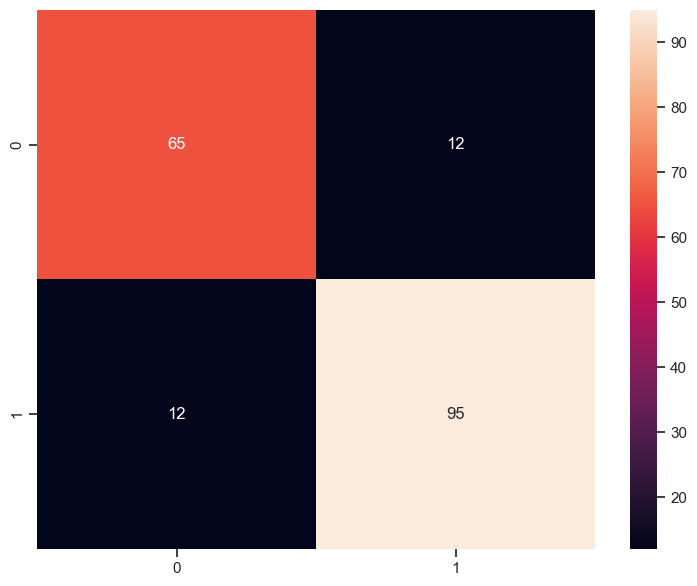

In [66]:
cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt="d")

In [67]:
acc_gb = accuracy_score(y_test, y_pred_gb)
clr_gb = classification_report(y_test, y_pred_gb)
print('The accuracy is \n',acc_gb)
print('------------------')
print('The Confusion marix \n',cm_gb)
print('------------------')
print(clr_gb)

The accuracy is 
 0.8695652173913043
------------------
The Confusion marix 
 [[65 12]
 [12 95]]
------------------
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        77
           1       0.89      0.89      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



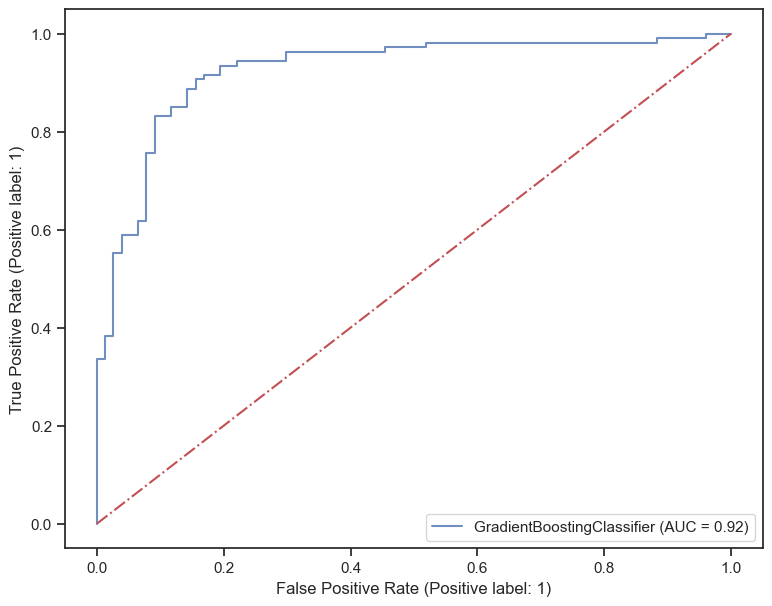

In [68]:
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(GBC, X_test, y_test, ax=ax, alpha=0.8)
plt.plot([0, 1], [0, 1], color='r',  linestyle='-.')

#### 5.ExtraTreesClassifier

In [69]:
ETC = ExtraTreesClassifier(n_estimators = 250, criterion ='entropy', max_features = 3).fit(X_train,y_train)

In [70]:
y_pred_et = ETC.predict(X_test)
y_pred_et

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [71]:
y_test.values

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

<AxesSubplot:>

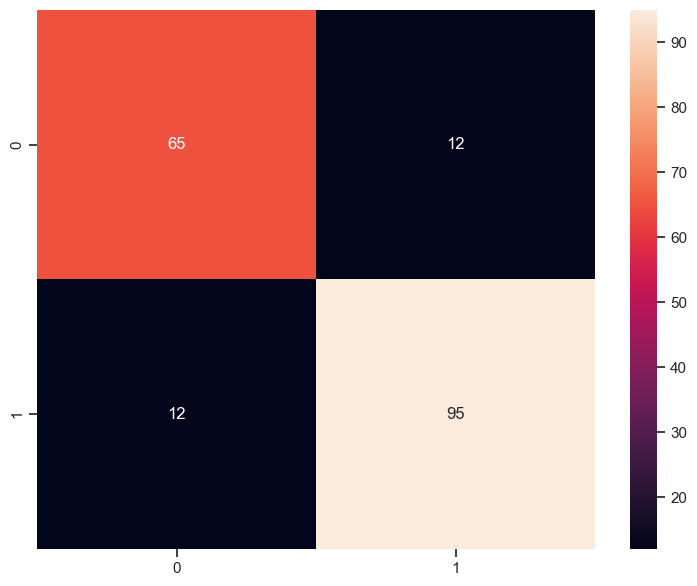

In [72]:
cm_et = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_et, annot=True, fmt="d")

In [73]:
acc_et = accuracy_score(y_test, y_pred_et)
clr_et = classification_report(y_test, y_pred_et)
print('The accuracy is \n',acc_et)
print('------------------')
print('The Confusion marix \n',cm_et)
print('------------------')
print(clr_et)

The accuracy is 
 0.8858695652173914
------------------
The Confusion marix 
 [[65 12]
 [12 95]]
------------------
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        77
           1       0.92      0.88      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



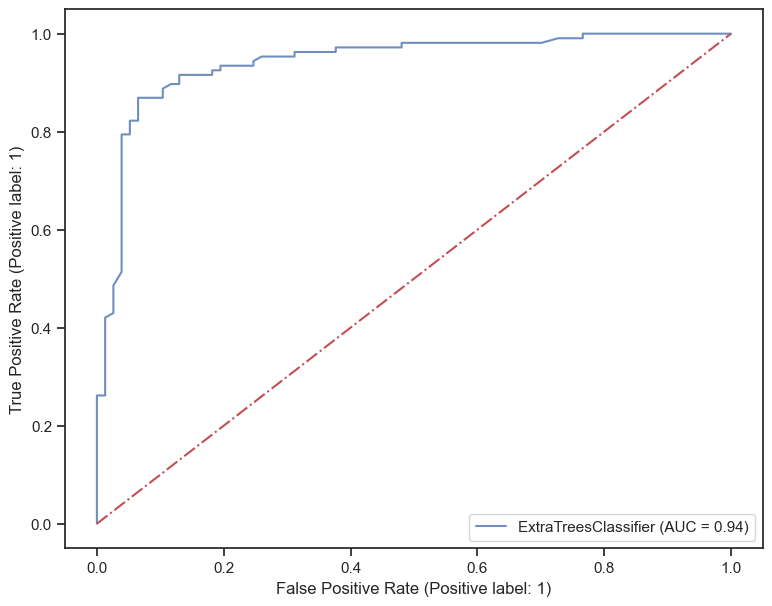

In [74]:
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(ETC, X_test, y_test, ax=ax, alpha=0.8)
plt.plot([0, 1], [0, 1], color='r',  linestyle='-.')

### With exculding the Unsignificant Features - One by one 

#### Thanks